## Data Loading

In [ ]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


## Data Inspection


In [ ]:
df.info()
df.isnull().sum()


## Data Cleaning
Converted `TotalCharges` to numeric format and removed rows with missing values.



In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


## Feature and Target Preparation
Removed non-informative identifier columns and encoded the target variable for machine learning.


In [ ]:
df = df.drop('customerID', axis=1)


### Encoding Target Variable
Converted the target variable `Churn` from categorical (Yes/No) to numerical (1/0).


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


The dataset is moderately imbalanced, which is common in churn prediction problems.
Therefore, evaluation metrics beyond accuracy such as precision, recall, and F1-score are considered.


## Encoding Categorical Features
Converted categorical variables into numerical format using one-hot encoding.


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.shape


## Data Validation
Verified that the dataset contains no missing values after preprocessing.


In [ ]:
df.isnull().sum().sum()

## Train-Test Split
Split the dataset into training and testing sets to evaluate model performance on unseen data.


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y)



## Feature Scaling
Standardized numerical features so that they have a mean of 0 and standard deviation of 1.


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training: Logistic Regression
Trained a Logistic Regression model to predict customer churn and evaluated its performance using classification metrics.


In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred_lr = log_reg.predict(X_test_scaled)

### Model Evaluation
Evaluated the Logistic Regression model using accuracy, precision, recall, F1-score, and confusion matrix.


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.7796730632551528
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1033
           1       0.70      0.30      0.42       374

    accuracy                           0.78      1407
   macro avg       0.74      0.63      0.64      1407
weighted avg       0.77      0.78      0.75      1407



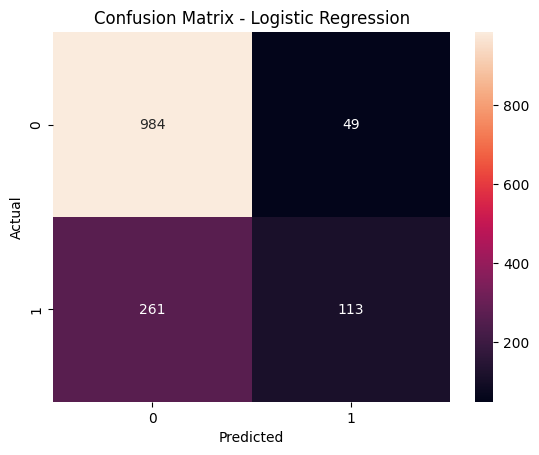

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


The Logistic Regression model correctly identified most non-churn customers but missed a significant number of churn cases, resulting in low recall for the churn class.


## Model Training: Random Forest
Trained a Random Forest classifier to improve churn prediction by capturing non-linear patterns in the data.


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42)



In [22]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
y_pred_rf = rf_model.predict(X_test)


Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7945984363894811
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



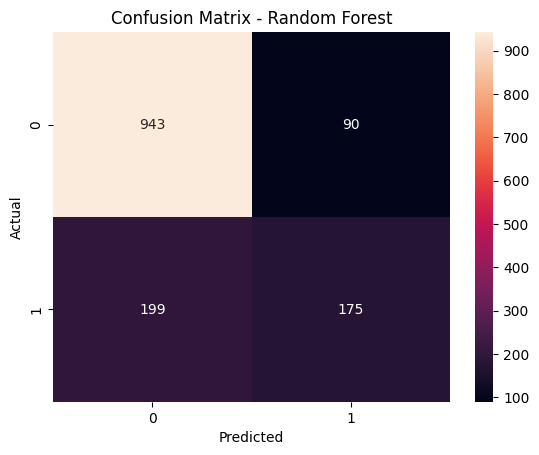

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Random Forest outperformed Logistic Regression by achieving higher recall and F1-score for churn customers. Although it produced slightly more false positives, it is better suited for identifying customers at risk of churn, which is critical for business decision-making.
